In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
insurance_df = pd.read_excel('Motor RP Analyst Interview Activity.xlsx', sheet_name='Data')
insurance_df.head()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
0,16042,2019-02-28,0.002740,0.00000,0.0000,0,NaN,NaN,NaN,NaN,...,FIAT,20,20,1,MANUAL,East Midlands,Male,2019-02-01 00:00:00,2016-11-26,Blue
1,41414,2019-03-20,1.000000,238.33650,238.3365,0,NaN,NaN,NaN,NaN,...,FORD,25,25,1,MANUAL,South East,Female,2017-11-01 00:00:00,2012-03-12,Grey
2,58837,2019-11-29,0.420765,77.31347,183.7450,0,NaN,NaN,NaN,NaN,...,PEUGEOT,42,42,1,MANUAL,West Midlands,Female,2016-09-01 00:00:00,1994-11-09,Silver
3,65415,2019-02-17,1.000000,494.98150,246.5586,0,NaN,NaN,NaN,NaN,...,NISSAN,31,31,1,AUTOMATIC,North West,Female,2019-02-16 00:00:00,2019-07-01,White
4,81565,2018-04-24,1.000000,120.05060,120.0506,0,NaN,NaN,NaN,NaN,...,KIA,61,61,1,MANUAL,South West,Male,2013-06-01 00:00:00,1974-04-07,Silver


## Quick Checks

In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      100000 non-null  int64         
 1   start_date              100000 non-null  datetime64[ns]
 2   exposure                100000 non-null  float64       
 3   net_earned_premium      99978 non-null   float64       
 4   net_written_premium     100000 non-null  float64       
 5   claim_count             100000 non-null  int64         
 6   is_capped_incurred      7419 non-null    float64       
 7   incurred                7419 non-null    float64       
 8   capped_incurred         7419 non-null    float64       
 9   bi_incurred             7419 non-null    float64       
 10  ad_incurred             7419 non-null    float64       
 11  pd_incurred             7419 non-null    float64       
 12  th_incurred             7419 no

In [5]:
insurance_df.columns

Index(['id', 'start_date', 'exposure', 'net_earned_premium',
       'net_written_premium', 'claim_count', 'is_capped_incurred', 'incurred',
       'capped_incurred', 'bi_incurred', 'ad_incurred', 'pd_incurred',
       'th_incurred', 'ws_incurred', 'bi_count', 'ad_count', 'pd_count',
       'th_count', 'ws_count', 'business_provider', 'cover', 'voluntary_xs',
       'ncd', 'pncd', 'vehicle_use', 'entitlement', 'overnight_location',
       'vehicle_value', 'vehicle_annual_mileage', 'vehicle_age',
       'vehicle_make', 'd1_age', 'd1_residency_years', 'd1_is_uk_resident',
       'transmission', 'region', 'gender', 'vehicle_purchase_date',
       'licence_test_date', 'primary_car_colour'],
      dtype='object')

In [6]:
insurance_df.describe()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,ws_count,voluntary_xs,ncd,vehicle_value,vehicle_annual_mileage,vehicle_age,d1_age,d1_residency_years,d1_is_uk_resident,licence_test_date
count,100000.000000,100000,100000.000000,99978.000000,100000.000000,100000.000000,7419.000000,7419.000000,7419.000000,7419.000000,...,7419.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,99993
mean,50000.500000,2019-03-20 00:31:23.520000256,0.719595,272.432194,364.273773,0.079340,0.001483,2797.004851,2589.680535,989.259222,...,0.256638,197.238500,5.449590,5525.167150,6878.596280,8.378470,39.937510,38.400150,0.92853,2002-08-24 07:05:07.065494656
min,1.000000,2018-04-01 00:00:00,0.002732,-1134.753000,0.000000,0.000000,0.000000,-1854.640000,-1854.640000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,17.000000,0.000000,0.00000,1958-03-04 00:00:00
25%,25000.750000,2018-09-15 00:00:00,0.439891,114.164475,181.881875,0.000000,0.000000,34.500000,34.500000,0.000000,...,0.000000,100.000000,2.000000,1695.000000,5000.000000,5.000000,26.000000,25.000000,1.00000,1994-05-24 00:00:00
50%,50000.500000,2019-03-21 00:00:00,0.937159,206.621700,284.771550,0.000000,0.000000,159.500000,159.500000,0.000000,...,0.000000,250.000000,6.000000,3745.000000,6000.000000,8.000000,38.000000,36.000000,1.00000,2003-05-02 00:00:00
75%,75000.250000,2019-09-09 00:00:00,1.000000,359.323175,455.693300,0.000000,0.000000,2868.070000,2868.070000,0.000000,...,1.000000,250.000000,9.000000,7100.000000,9000.000000,12.000000,51.000000,51.000000,1.00000,2013-03-29 00:00:00
max,100000.000000,2020-03-31 00:00:00,1.000000,3912.240000,4394.661000,4.000000,1.000000,489297.500000,55259.600000,478339.300000,...,3.000000,600.000000,9.000000,163995.000000,400000.000000,41.000000,118.000000,118.000000,1.00000,2020-09-30 00:00:00
std,28867.657797,NaN,0.344350,250.834453,281.664104,0.289941,0.038480,10651.871541,5338.339710,9691.253028,...,0.447479,136.849868,3.637053,5765.353771,4056.018302,4.680995,15.415234,16.449685,0.25761,NaN


### Notes

- Data cover mentions 42 columns while the data tab only has 40 columns.
- More than 10 columns have missing values.

# Section 1

### Claim Count

In [7]:
claim_count = (insurance_df['claim_count'] > 0).sum()
claim_count

7419

### Average value of claim

In [8]:
# Check rows with capped incurred values
any_capped = insurance_df[insurance_df['is_capped_incurred'] == 1]
any_capped

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
1219,926,2019-05-06,0.778689,156.8325,158.8851,1,1.0,158210.50,50000.0,157321.9,...,RENAULT,58,58,1,MANUAL,Yorkshire,Male,2019-04-07 00:00:00,1994-04-07,Silver
13244,73616,2018-11-26,1.000000,256.7595,256.7595,1,1.0,69157.00,50100.0,69057.0,...,VAUXHALL,47,47,1,MANUAL,Yorkshire,Male,2018-05-01 00:00:00,1990-01-03,Silver
19983,39572,2018-06-22,1.000000,336.2649,298.5108,1,1.0,156818.90,50100.0,146014.7,...,SAAB,35,35,1,AUTOMATIC,South East,Female,2015-11-01 00:00:00,2001-06-19,Grey
34043,42651,2018-12-21,0.383562,1343.1140,1822.8320,2,1.0,55619.67,55259.6,14400.0,...,FIAT,21,21,1,MANUAL,South East,Male,2018-12-20 00:00:00,2018-10-22,Black
41597,34816,2019-01-18,1.000000,363.7175,301.6689,1,1.0,50433.00,50000.0,50433.0,...,HONDA,28,28,1,MANUAL,South East,Male,2019-06-22 00:00:00,2008-05-16,Blue
61920,5670,2019-04-03,1.000000,1155.7860,1155.7860,1,1.0,350073.60,50075.0,344822.7,...,FORD,23,20,0,MANUAL,East Midlands,Female,2019-04-01 00:00:00,2019-02-12,White
63022,41161,2018-09-13,1.000000,667.5200,667.5200,1,1.0,440802.30,49895.0,440907.3,...,VAUXHALL,19,19,1,MANUAL,Wales,Male,2017-03-01 00:00:00,2017-09-01,White
67165,72019,2019-10-22,0.467213,456.8726,870.9134,1,1.0,57387.50,49995.0,0.0,...,LANDROVER,33,14,0,AUTOMATIC,East Anglia,Male,2018-10-01 00:00:00,2007-11-02,NaN
76870,47548,2018-05-23,1.000000,547.6455,503.4993,1,1.0,56601.53,50100.0,11057.6,...,PEUGEOT,48,48,1,MANUAL,Yorkshire,Female,2018-07-13 00:00:00,2017-05-12,NaN
83874,77232,2018-09-07,0.808219,1306.2230,945.8155,1,1.0,489297.50,50050.0,478339.3,...,VAUXHALL,18,18,1,MANUAL,South East,Male,2017-01-28 00:00:00,2017-09-07,Blue


In [9]:
# Filter for rows with claims
claims_data = insurance_df[insurance_df['claim_count'] > 0]

# Use a function to check if a value is not a number
def is_not_numeric(x):
    try:
        pd.to_numeric(x)
        return False
    except (ValueError, TypeError):
        return True

# Apply the function to the 'incurred' column and find unique values
non_numeric_unique_values = claims_data[claims_data['incurred'].apply(is_not_numeric)]['incurred'].unique()

non_numeric_unique_values

array([], dtype=float64)

In [10]:
# Average claim without cap check
average_claim = insurance_df[insurance_df['claim_count'] > 0]['incurred'].mean()
average_claim

2797.0048510580937

In [11]:
# Average claim with cap check

### Year to year trend

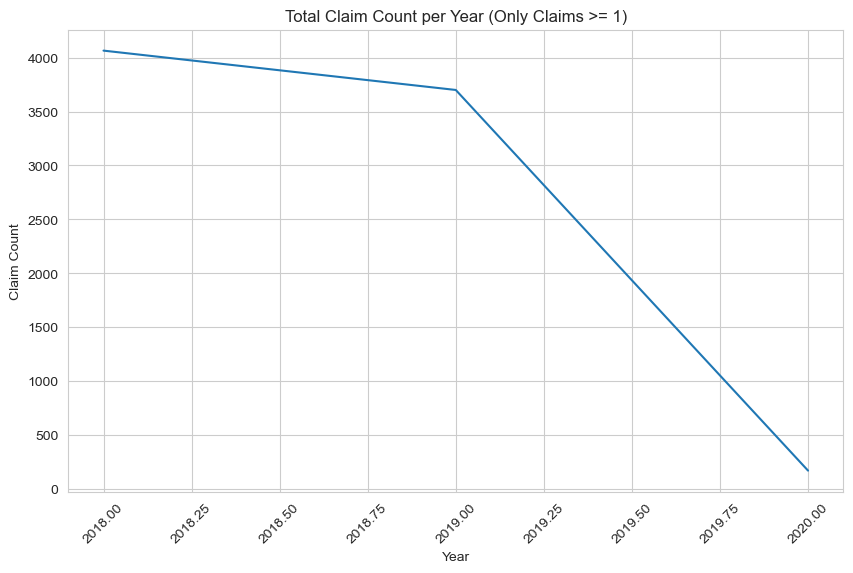

In [14]:

# Filter rows where claim_count >= 1
df_filtered = insurance_df[insurance_df['claim_count'] >= 1].copy()

# Extract year from start_date
df_filtered['year'] = df_filtered['start_date'].dt.year

# Aggregate total claim_count per year
claims_per_year = df_filtered.groupby('year')['claim_count'].sum().reset_index()

# --- Plot with Seaborn ---
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='claim_count', data=claims_per_year)
plt.title('Total Claim Count per Year (Only Claims >= 1)')
plt.xlabel('Year')
plt.ylabel('Claim Count')
plt.xticks(rotation=45)
plt.show()

Entries per year:
year
2018    38539
2019    49808
2020    11653
Name: count, dtype: int64


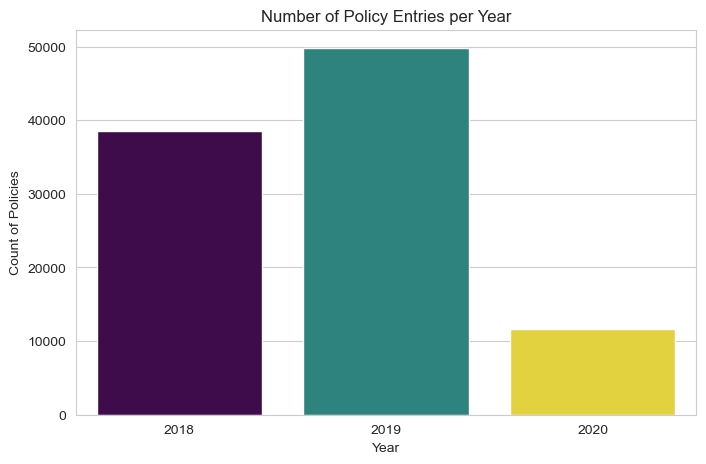

In [17]:
# Extract year from start_date for the full dataset
insurance_df['year'] = insurance_df['start_date'].dt.year

# Count number of entries per year
entries_per_year = insurance_df['year'].value_counts().sort_index()

print("Entries per year:")
print(entries_per_year)

# Plot the distribution
plt.figure(figsize=(8,5))
sns.barplot(x=entries_per_year.index, y=entries_per_year.values,  hue=entries_per_year.index, palette='viridis')
# Remove legend
plt.legend().remove()
plt.title("Number of Policy Entries per Year")
plt.xlabel("Year")
plt.ylabel("Count of Policies")
plt.show()
